<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/YB_0919_1_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_chipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64


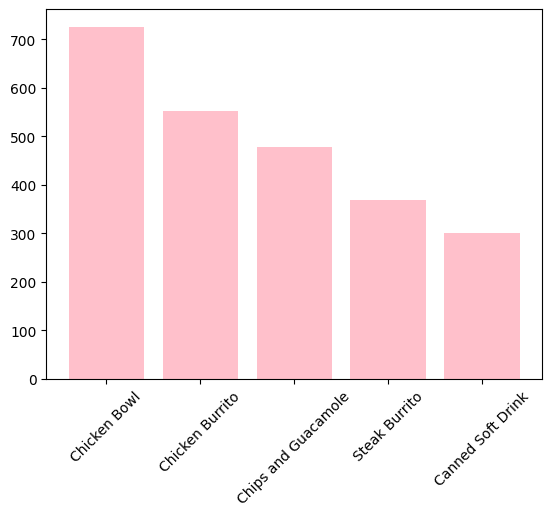

In [ ]:
top5 = chipo['item_name'].value_counts().head(5)
print(top5)
plt.bar(top5.index, top5.values, color = 'pink')
plt.xticks(rotation=45)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

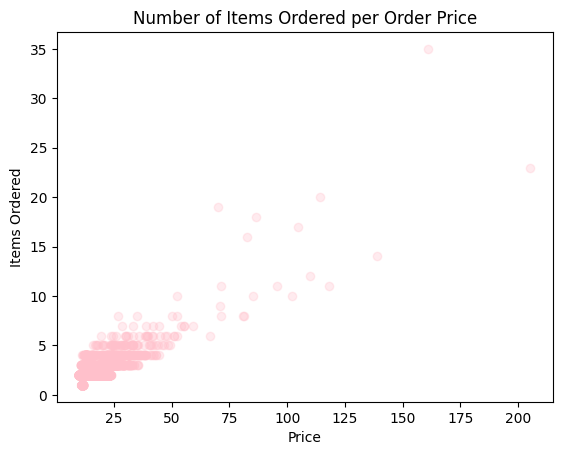

In [ ]:
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)
order_price = chipo.groupby('order_id')['item_price'].sum()
item_ordered = chipo.groupby('order_id')['quantity'].sum()

plt.scatter(order_price, item_ordered, color = 'pink', alpha=0.3)
plt.title('Number of Items Ordered per Order Price')
plt.xlabel('Price')
plt.ylabel('Items Ordered')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

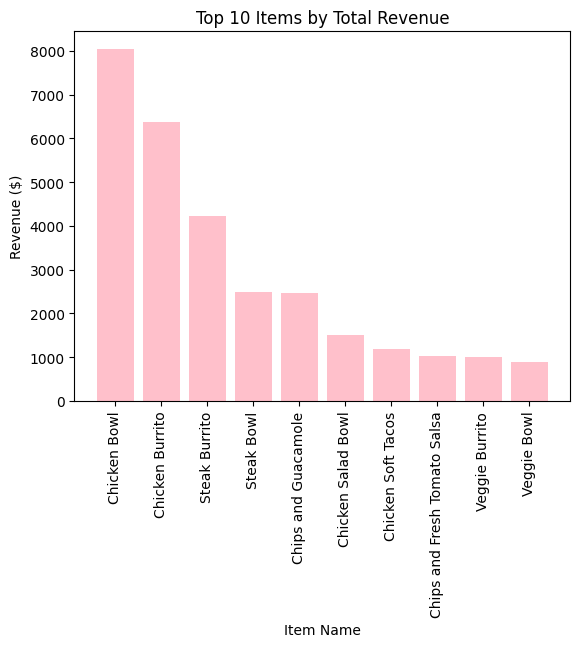

In [ ]:
# 매출 계산 (quantity × price)
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

# 메뉴별 매출 합계 계산 > 상위 10개
top_revenue = chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(10)

# 그래프 그리기
plt.bar(top_revenue.index, top_revenue.values, color = 'pink')
plt.title('Top 10 Items by Total Revenue')
plt.xlabel('Item Name')
plt.ylabel('Revenue ($)')
plt.xticks(rotation='vertical')
plt.show()